In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("/home/deslin/Documents/ML Projects/data/supermarket_sales.csv")

In [3]:
data.shape # number of row and column

(1000, 17)

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:

data.describe(include='O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Total,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,990,89,506,3
top,877-22-3308,A,Yangon,Member,Female,Fashion accessories,470.988,02-07-2019,14:42,Ewallet
freq,1,340,340,501,501,178,2,20,7,345


In [7]:
data.isna().sum() #checking missing value

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                       object
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
#change total datatype to int
data['Total'] = data['Total'].apply(lambda x:x.replace('"',''))

In [10]:
data['Total']=data['Total'].astype('float64')

In [11]:
data.dtypes['Total']

dtype('float64')

In [12]:
#change date column dtype to date
data['actualDate'] = data['Date'].astype('datetime64')

In [13]:
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
actualDate                 datetime64[ns]
dtype: object

In [14]:

data['Month']=data['actualDate'].apply(lambda x : x.strftime("%B"))  # %B used for actual month name # %m used for month number

In [15]:
import calendar

data['WeekDay']=data['actualDate'].apply(lambda x : calendar.day_name[x.weekday()])

data.head()

#### Total number of customer visited

In [16]:
num_of_cust_visits=data['Invoice ID'].nunique()
num_of_cust_visits

1000

#### no of visites per branch

In [17]:
most_visited_branch = data['Branch'].value_counts()
most_visited_branch

A    340
B    332
C    328
Name: Branch, dtype: int64

#### City vs Customer Analysis

#### Cutomer Footfall

In [18]:
customer_footfall = data.groupby('City').count()['Invoice ID'].sort_values()
print(customer_footfall)

City
Naypyitaw    328
Mandalay     332
Yangon       340
Name: Invoice ID, dtype: int64


#### Customer Footfall monthwise


In [19]:
customer_footfall_month =data.groupby('Month').count()['Invoice ID']
customer_footfall_month

Month
February    303
January     352
March       345
Name: Invoice ID, dtype: int64

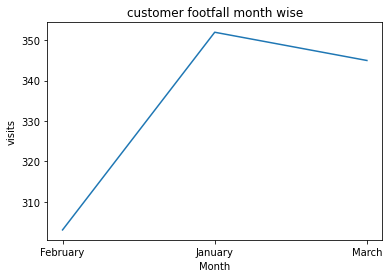

In [20]:
import matplotlib.pyplot as plt
plt.plot(customer_footfall_month.index,customer_footfall_month)
plt.xlabel("Month")
plt.ylabel("visits")
plt.title("customer footfall month wise")
plt.show()

#### customer footfall daywise

In [38]:
customer_footfall_day=data.groupby('WeekDay').count()['Invoice ID'].sort_values()

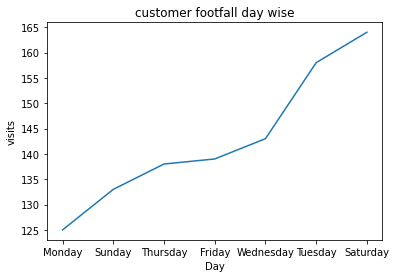

In [40]:
plt.plot(customer_footfall_day.index,customer_footfall_day)
plt.xlabel("Day")
plt.ylabel("visits")
plt.title("customer footfall day wise")
plt.show()

#### month wise income

In [21]:
month_wise_income =data.groupby('Month').sum()['Total'].sort_values()
month_wise_income

Month
February     97219.374
March       109455.507
January     116291.868
Name: Total, dtype: float64

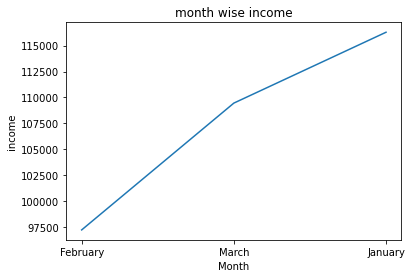

In [22]:
plt.plot(month_wise_income.index,month_wise_income)
plt.xlabel("Month")
plt.ylabel("income")
plt.title("month wise income")
plt.show()

#### city_wise_income

In [41]:
total_income_city = data.groupby('City').sum()['Total']
total_income_city

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

#### Branh wise income

In [26]:
branch_wise_profit=data.groupby('Branch').mean()['gross income']
branch_wise_profit

Branch
A    14.874001
B    15.232024
C    16.052367
Name: gross income, dtype: float64

#### Most Sell Product

In [49]:
most_sell_product=data.groupby('Product line').sum()['Total']
most_sell_product

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [50]:
mylabels = most_sell_product.index

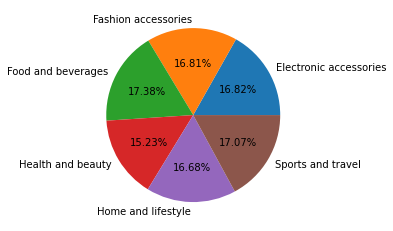

In [52]:
plt.pie(most_sell_product,labels = mylabels,autopct='%1.2f%%')
plt.show() 

#### Customer Ratio based on Customer Type

In [54]:
customer_ratio = (data['Customer type'].value_counts() / data.shape[0])*100
customer_ratio

Member    50.1
Normal    49.9
Name: Customer type, dtype: float64

#### Costiest Product in the Shop

In [55]:
prod_line = data.groupby('Product line').max()['Unit price'].sort_values(ascending = False).index[0]
cost = data.groupby('Product line').max()['Unit price'].sort_values(ascending = False)[0]

print("Costiest Product Line:",prod_line," and Cost:",cost)

Costiest Product Line: Sports and travel  and Cost: 99.96


#### Cheapest Product in the Shop

In [56]:

prod_line = data.groupby('Product line').min()['Unit price'].sort_values(ascending = True).index[0]
cost = data.groupby('Product line').min()['Unit price'].sort_values(ascending = True)[0]

print("Costiest Product Line:",prod_line," and Cost:",cost)

Costiest Product Line: Health and beauty  and Cost: 10.08


#### Total Gross income

In [58]:
gross_income = data['Total'].sum()

print("Total Gross Income : ",gross_income)

Total Gross Income :  322966.749


#### Total Margin or Profit

In [59]:
total_margin = data['gross income'].sum()
print("Total Gross Income : ",total_margin)

Total Gross Income :  15379.368999999999
